Imports

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [44]:
df = pd.read_csv("./stroke.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [45]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
1,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
2,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
3,10434,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
4,27419,Female,59,0,0,Yes,Private,Rural,76.15,29.065758,Unknown,1


## Descriptive Statistics

Looking at the highs and lows of our datasets. Finding our averages, standard deviation, and data variability.

 Here our Confidence Intervals refer to the probability that the population average glucose levels will fall between a set of values for a certain proportion of BMIs

In [46]:
x = df["avg_glucose_level"]
y = df["bmi"]

# Run model and print results
result = pearsonr(x, y)
stat, p = result
print('statistic=%.3f, pvalue=%.3f' % (stat, p))

# Analyze p for statistical significance
if p > 0.05:
  print("Probably independent")
else:
  print("Probably dependent")

# Result object has a confidence interval method
print(result.confidence_interval())

statistic=0.169, pvalue=0.000
Probably dependent
ConfidenceInterval(low=0.14202008447083495, high=0.19530277327421333)


### Standard Deviation

In [47]:
df_stats = df.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
np.std(df_stats)

age                  22.632584
hypertension          0.296604
heart_disease         0.226062
avg_glucose_level    45.280572
bmi                   7.697598
stroke                0.215319
dtype: float64

### Population Variance

In [48]:
np.var(df_stats, ddof=0)

age                   512.233859
hypertension            0.087974
heart_disease           0.051104
avg_glucose_level    2050.330161
bmi                    59.253016
stroke                  0.046362
dtype: float64

In [49]:
#np.cov(df_stats)


## Visualizations

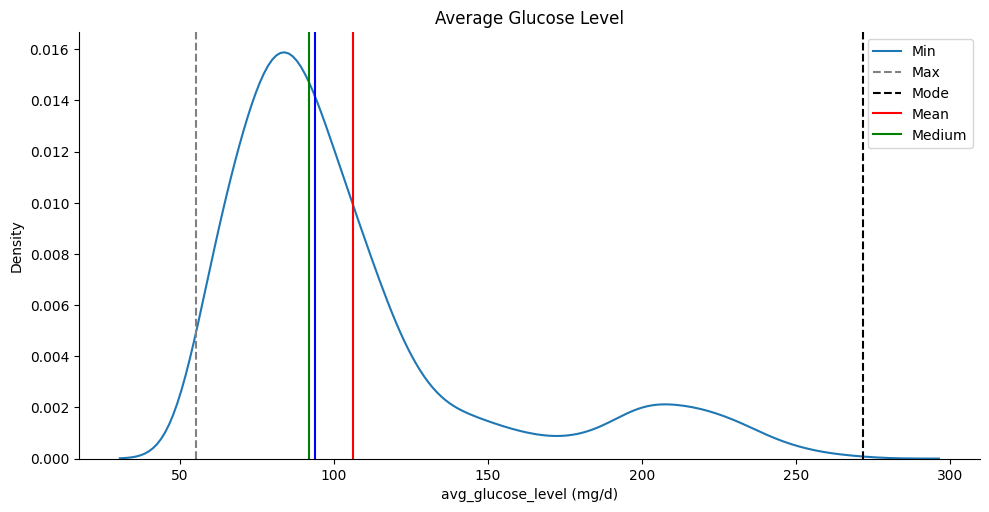

In [50]:
sns.displot(df, x="avg_glucose_level", kind="kde", height=5, aspect=2)
plt.title("Average Glucose Level")
plt.xlabel("avg_glucose_level (mg/d)")

min_gl = df.avg_glucose_level.min()
max_gl = df.avg_glucose_level.max()
mean_gl = df.avg_glucose_level.mean()
median_gl = df.avg_glucose_level.median()
mode_gl = df.avg_glucose_level.mode()[0]

plt.axvline(x= min_gl, color="grey", linestyle='--')
plt.axvline(x= max_gl, color="black", linestyle='--')
plt.axvline(x= mean_gl, color="red")
plt.axvline(x= median_gl, color="green")
plt.axvline(x= mode_gl, color="blue")

plt.legend(['Min','Max','Mode', 'Mean', "Medium"], loc="upper right")

plt.show()

#print(min_gl, max_gl, mean_gl, median_gl, mode_gl)

### Average Glucose Levels in our Dataset 
- Minimum: 55.12 mg/d
- Maximum: 271.74 mg/d
- Mean: 106.14 mg/d
- Median: 91.88 mg/d
- Mode: 93.88 mg/d

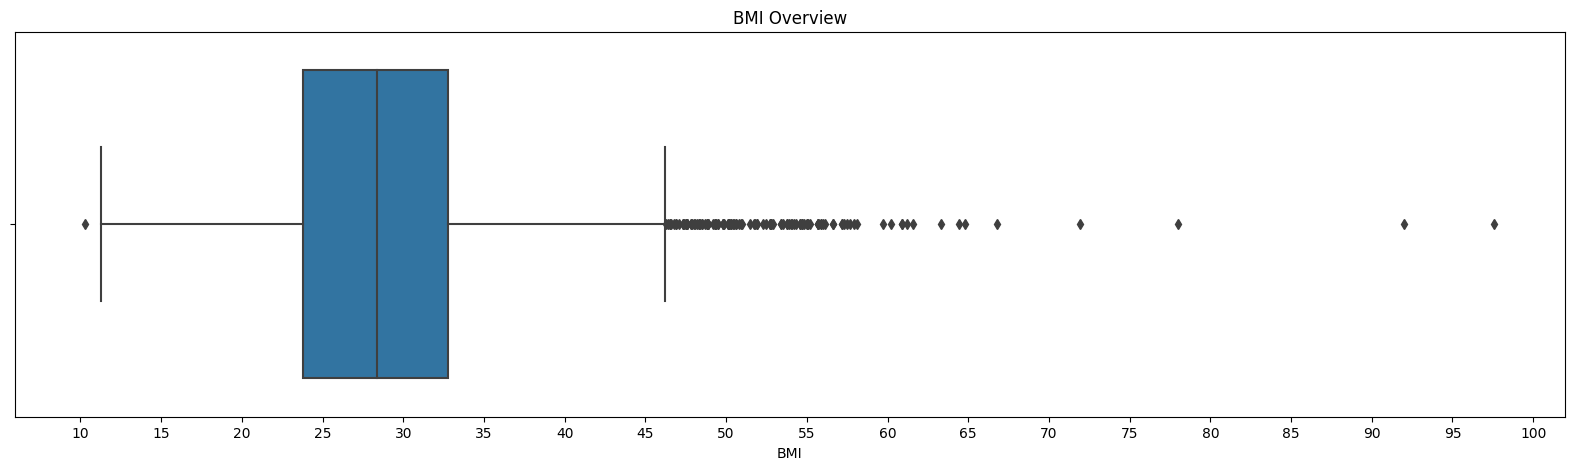

In [51]:
plt.figure(figsize=(20,5))

sns.boxplot(x=df["bmi"])
plt.title("BMI Overview")
plt.xlabel("BMI")

min_bmi = df.bmi.min()
max_bmi = df.bmi.max()
mean_bmi = df.bmi.mean()
median_bmi = df.bmi.median()
mode_bmi = df.bmi.mode()[0]

plt.xticks(np.arange(min_bmi-.3, max_bmi+5, 5))
plt.show()

#print(min_bmi, max_bmi, mean_bmi, median_bmi, mode_bmi)

### BMI Overview in our Dataset 
- Minimum: 10.30 BMI
- Maximum: 97.60 BMI
- Mean: 28.89 BMI
- Median: 28.40 BMI
- Mode: 28.64 BMI

#### Replacing Zeros and Ones with Categorical Differences for better visulization between types

In [52]:
df_stroke = df.copy(deep=True)
df_stroke.replace(0, 'No Stroke', inplace=True)
df_stroke.replace(1, 'Stroke', inplace=True)
df_stroke.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1615,49120,Female,39,No Stroke,No Stroke,Yes,Govt_job,Rural,69.38,22.100000,Unknown,No Stroke
967,8960,Female,42,No Stroke,No Stroke,No,Self-employed,Rural,73.41,56.000000,smokes,No Stroke
976,9489,Female,65,No Stroke,No Stroke,Yes,Private,Urban,84.75,21.400000,Unknown,No Stroke
675,1893,Female,38,No Stroke,No Stroke,Yes,Private,Urban,91.68,42.800000,formerly smoked,No Stroke
3050,3352,Male,78,Stroke,No Stroke,Yes,Self-employed,Urban,93.13,28.647936,formerly smoked,Stroke


<Figure size 2000x500 with 0 Axes>

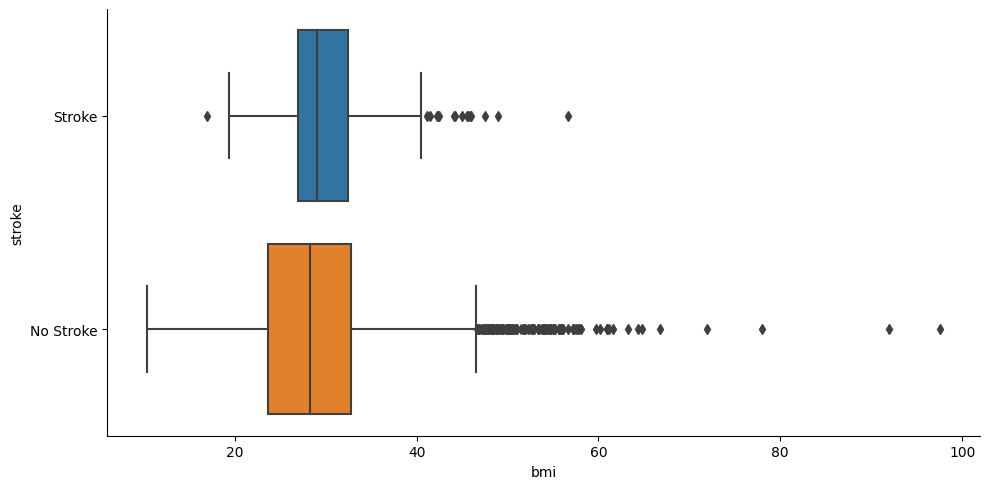

In [53]:
plt.figure(figsize=(20,5))
sns.catplot(data=df_stroke, x="bmi", y="stroke", kind="box", height=5, aspect=2)
plt.show()

#### Smokers and Strokes

Here we can see the general percentage of smokers compared to our population

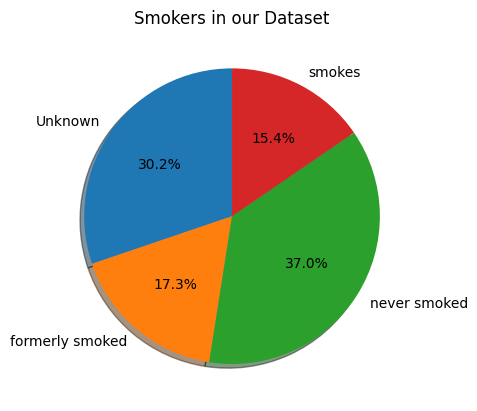

In [54]:
smoke_series = df.groupby("smoking_status").count()["id"]
smoke_series

plt.pie(smoke_series, labels = smoke_series.index, shadow=True, startangle=90, autopct="%1.1f%%")

plt.title("Smokers in our Dataset")
plt.show()

#### A comparison between different age groups and those that had a stroke

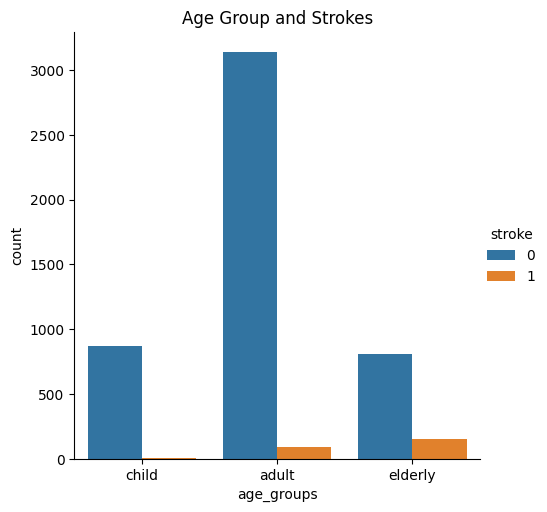

In [55]:
age_groups = [0,18,65,100]
age_names = ['child', 'adult', 'elderly']


#making age groups by creating bins
df['age_groups'] = pd.cut(x=df['age'], bins=age_groups, labels=age_names)


sns.catplot(x='age_groups', data=df, hue="stroke", kind="count").set(title='Age Group and Strokes')
plt.show()

## Inferential Statistics

### Male and Female with Stroke

#### Through our violin plot, we acquire two findings of our dataset. The **shape** of females and males with or without a stroke appear similar as they age in the plot. For either gender, approaching **~80 years old** is the increased chances of finding those with a stroke in our dataset. One key difference is that **~60 years old** is when males start to have an increase likelhood of having a stroke in the data.

<Axes: xlabel='age', ylabel='gender'>

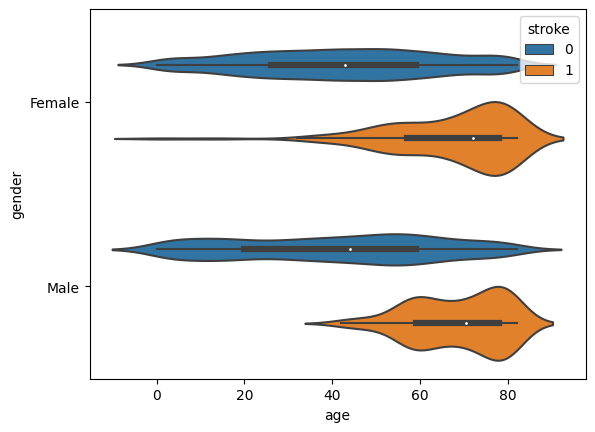

In [56]:
sns.violinplot(data=df, x="age", y="gender", hue="stroke")

#### The violin plot also shows potential outliers that we have not known of previously, let's see what's going on

In [57]:
min_female_age_with_stroke=df.query("stroke == 1 and gender == 'Female'")["age"].min()
df.query(f"stroke == 1 and gender == 'Female' and age == {min_female_age_with_stroke}")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
95,69768,Female,1,0,0,No,children,Urban,70.37,29.065758,Unknown,1,child


#### Unfortunately, there was 1 child, 1 year of age that had a stroke, causing the outlier in our plot

### Heatmap for Corrlation Coefficient

In [58]:
#first we're going to need to turn out categorical data into numeric
int_df = df.drop(columns=["id"])

cols=int_df.select_dtypes(include=['object']).columns

# This code will fetch columns whose data type is object.
le=LabelEncoder()

# Initializing our Label Encoder object
int_df[cols]=int_df[cols].apply(le.fit_transform)

# Transfering categorical data into numeric
int_df.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,0,61,0,0,1,3,0,202.21,29.065758,2,1,adult
1,0,49,0,0,1,2,1,171.23,34.400000,3,1,adult
2,0,79,1,0,1,3,0,174.12,24.000000,2,1,elderly
3,0,69,0,0,0,2,1,94.39,22.800000,2,1,elderly
4,0,59,0,0,1,2,0,76.15,29.065758,0,1,adult
5,0,78,0,0,1,2,1,58.57,24.200000,0,1,elderly
6,0,81,1,0,1,2,0,80.43,29.700000,2,1,elderly
7,0,61,0,1,1,0,0,120.46,36.800000,3,1,adult
8,0,54,0,0,1,2,1,104.51,27.300000,3,1,adult
9,0,79,0,1,1,2,1,214.09,28.200000,2,1,elderly


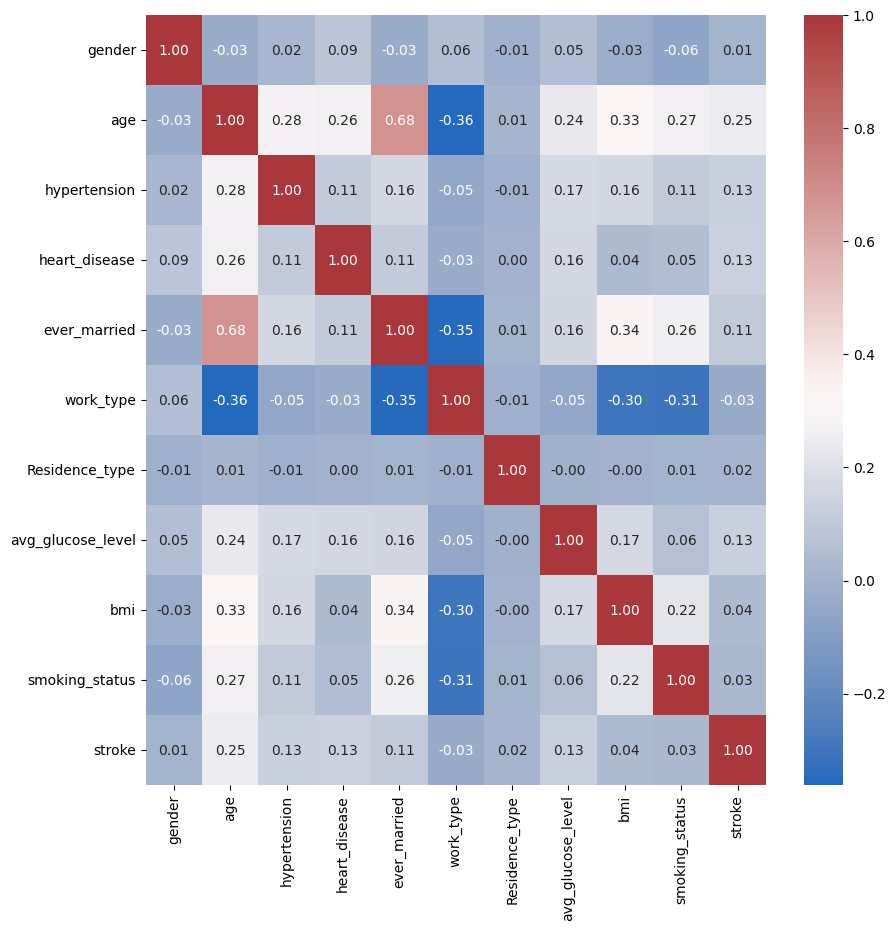

In [59]:
correl = int_df.corr(numeric_only=True) #int_df.corr(numeric_only=True) for vscode ###
plt.figure(figsize=(10,10))
sns.heatmap(correl, 
            annot=True, fmt=".2f",
            xticklabels=correl.columns.values,
            yticklabels=correl.columns.values, cmap= 'vlag')
plt.show()

#### Beyond the Heatmap

Let's take a look at a comparison between two numerical columns of data in our dataset. Using a regplot, we can see how our data fits in the default 95% confidence interval line. Between Average Glucose Level and BMI, the regplot expresses that the linear relationship between do not fall strongly enough in the confidence intervals for a linear regression model.

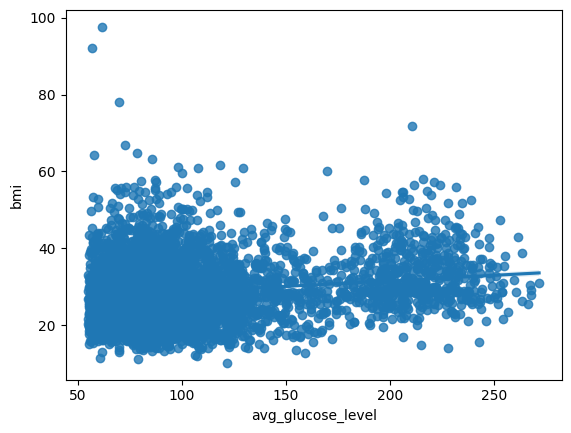

In [72]:
sns.regplot(df, x="avg_glucose_level", y="bmi")
plt.show()

[Credits to Frank Mollard on Kaggle for 3D Modelling function](https://www.kaggle.com/code/frankmollard/develop-a-stroke-risk-web-app-using-streamlit)

In [60]:
import plotly.graph_objects as go

def plot3d(df, cls: list, c: str, X: str, Y: str, Z: str, title):
    
    """
    Function to plot 3 dimensions, colored by category (c)
    
    df=pd.DataFrame
    cls=colors for no-stroke and stroke
    c=category to separate by color 
    X=X dimension
    Y=Y dimension
    Z=Z dimension
    title=title of the plot
    """
    
    fig = go.Figure()

    for i in range(len(df["%s" % (c)].unique())):
        fig.add_trace(
            go.Scatter3d(
                x=df.loc[df["%s" % (c)] == i, X], 
                y=df.loc[df["%s" % (c)] == i, Y], 
                z=df.loc[df["%s" % (c)] == i, Z],
                mode='markers',
                marker=dict(
                    size=7,
                    color=cls[i],            
                    opacity=0.6
                ), name = i,
                 hovertemplate = 
                    f"<i>{X}</i>: " +"%{x} <br>"+
                    f"<i>{Y}</i>: " +"%{y} <br>"+
                    f"<i>{Z}</i>: " +"%{z}"
            )
        )
        fig.update_layout(
            hoverlabel=dict(font=dict(color='white'))   
        )
    fig.update_layout(
        title=title,
        template="plotly_white",
        margin=dict(l=65, r=20, b=0, t=10),
        width=800,
        height=800,
        scene=dict(
                xaxis_title=X,
                yaxis_title=Y,
                zaxis_title=Z,
                camera={
                    "eye": {"x": 2, "y": 2, "z": 2}
                }
            ),
        title_y=0.95,
        legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.99, title="%s" % (c))
    )

    fig.show()
    
plot3d(df, ["#3a91e6", "red"], "stroke",
       "age", "avg_glucose_level", "bmi", 
       "3D Plot of Age, Average Glucose Level, and BMI"
      )

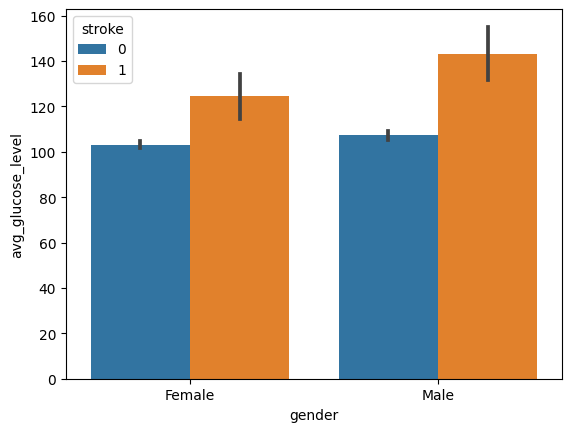

In [61]:
sns.barplot(data=df, x="gender", y="avg_glucose_level", hue="stroke")
plt.show()

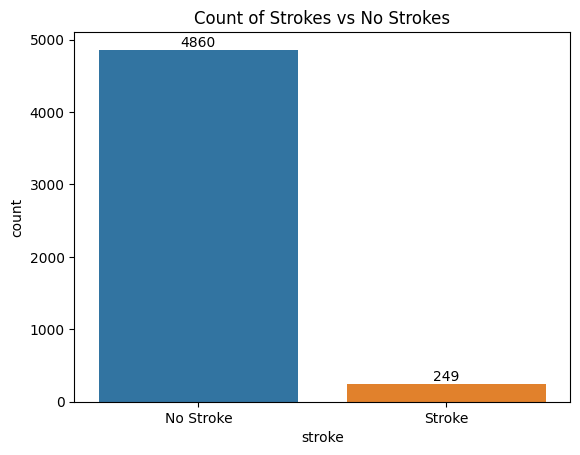

In [62]:
#stroke vs no stroke
stroke_count = sns.countplot(x="stroke", data=df)
stroke_count.set_title('Count of Strokes vs No Strokes')
stroke_count.set(xticklabels=['No Stroke', 'Stroke'])
stroke_count.bar_label(stroke_count.containers[0])
plt.show()

#as we can see there are 249 people who had a stroke in our whole dataset

In [63]:
#let's create our calculations for proportions

#heart disease
hd_stroke_count = df.query("heart_disease == 1 and stroke == 1")["stroke"].count()
hd_nostroke_count = df.query("heart_disease == 1 and stroke == 0")['stroke'].count()
total_hd = hd_stroke_count + hd_nostroke_count

#total_hd
p_hd_stroke = hd_stroke_count / total_hd
p_hd_nostroke = hd_nostroke_count / total_hd

#no heart disease
nohd_stroke_count = df.query("heart_disease == 0 and stroke == 1")["stroke"].count()
nohd_nostroke_count = df.query("heart_disease == 0 and stroke == 0")['stroke'].count()
total_nohd = nohd_stroke_count + nohd_nostroke_count

#total_nohd
p_nohd_stroke = nohd_stroke_count / total_nohd
p_nohd_nostroke = nohd_nostroke_count / total_nohd

In [64]:
#creating our dictionaries
heartDict = {'stroke': p_hd_stroke, 'no stroke': p_hd_nostroke}
noheartDict = {'stroke': p_nohd_stroke, 'no stroke': p_nohd_nostroke}

#setting up our dataframes from our dictionaries
heart_df = pd.DataFrame(heartDict, index=[0])
noheart_df = pd.DataFrame(noheartDict, index=[0])
heart_df = heart_df.T
noheart_df = noheart_df.T
heart_df = heart_df.rename(columns={0: 'Proportion'}).reset_index()
heart_df = heart_df.rename(columns={'index': 'Condition'})
heart_df['hd'] = 'heart disease'

noheart_df = noheart_df.rename(columns={0: 'Proportion'}).reset_index()
noheart_df = noheart_df.rename(columns={'index': 'Condition'})
noheart_df['hd'] = 'no heart disease'

heart = pd.concat([noheart_df, heart_df], ignore_index=True)
heart

,Condition,Proportion,hd
0,stroke,0.041796,no heart disease
1,no stroke,0.958204,no heart disease
2,stroke,0.170290,heart disease
3,no stroke,0.829710,heart disease


In [65]:
#making our proportion bar chart based off our heart dataframe

px.bar(heart, x="hd", y="Proportion",
             color='Condition', barmode='stack',
             height=400, width=600, labels={'hd':'Heart Disease Status'}, title="Heart Disease Correlation to Stroke")
#the chart shows that only 4% of the total people with no heart disease had a stroke compared to the people who do have 
#heart disease which is about 20% of the total

In [66]:
hypertension_stroke_count = df.query("hypertension == 1 and stroke == 1")["stroke"].count()
hypertension_nostroke_count = df.query("hypertension == 1 and stroke == 0")['stroke'].count()
total_hypertension = hypertension_stroke_count + hypertension_nostroke_count
#total_hypertension
p_hypertension_stroke = (hypertension_stroke_count / total_hypertension)
p_hypertension_nostroke = (hypertension_nostroke_count / total_hypertension)


#no hypertension
nohypertension_stroke_count = df.query("hypertension == 0 and stroke == 1")["stroke"].count()
nohypertension_nostroke_count = df.query("hypertension == 0 and stroke == 0")['stroke'].count()
total_nohypertension = nohypertension_stroke_count + nohypertension_nostroke_count
#total_hypertension
p_nohypertension_stroke = (nohypertension_stroke_count / total_nohypertension)
p_nohypertension_nostroke = (nohypertension_nostroke_count / total_nohypertension)


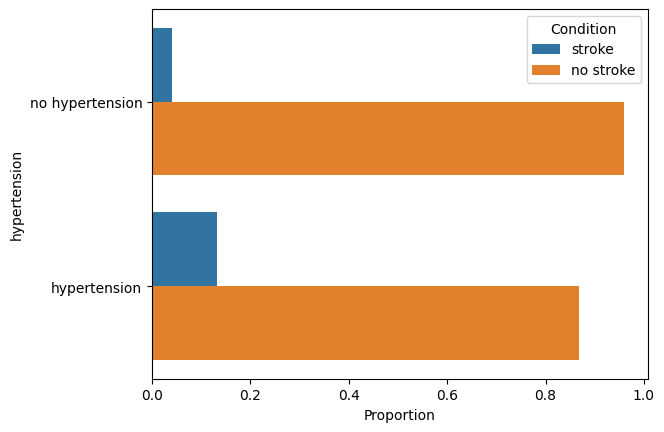

In [67]:
#creating our dictionaries
hypertensionDict = {'stroke': p_hypertension_stroke, 'no stroke': p_hypertension_nostroke}
nohypertensionDict = {'stroke': p_nohypertension_stroke, 'no stroke': p_nohypertension_nostroke}


#setting up our dataframes from our dictionaries
hypertension_df = pd.DataFrame(hypertensionDict, index=[0])
nohypertension_df = pd.DataFrame(nohypertensionDict, index=[0])
hypertension_df = hypertension_df.T
nohypertension_df = nohypertension_df.T
hypertension_df = hypertension_df.rename(columns={0: 'Proportion'}).reset_index()
hypertension_df = hypertension_df.rename(columns={'index': 'Condition'})
hypertension_df['hypertension'] = 'hypertension'


nohypertension_df = nohypertension_df.rename(columns={0: 'Proportion'}).reset_index()
nohypertension_df = nohypertension_df.rename(columns={'index': 'Condition'})
nohypertension_df['hypertension'] = 'no hypertension'


hypertension = pd.concat([nohypertension_df, hypertension_df], ignore_index=True)
hypertension
sns.barplot(x="Proportion", y="hypertension", hue="Condition", data=hypertension)
plt.show()